<a href="https://colab.research.google.com/github/bmshahrier/bixi-montreal/blob/master/bixi_montreal_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIXI Montreal Exploratory Data Analysis

In [0]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import datetime

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load csv Datafile from Google Drive

In [2]:
# Make connection with Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# Get access the GDrive
!ls -la /content/gdrive/My\ Drive/Colab\ Notebooks/

total 299
drwx------ 2 root root   4096 Jun  9 13:45 bixi-montreal
-rw------- 1 root root  95927 Jun 12 09:51 bixi-montreal-classification-model.ipynb
-rw------- 1 root root  89305 Jul  1 21:08 bixi-montreal-data-wrangling.ipynb
-rw------- 1 root root   3773 Jul  4 01:09 bixi-montreal-exploratory-data-analysis.ipynb
-rw------- 1 root root 107276 Jun 15 03:53 bixi-montreal-regression-model.ipynb
-rw------- 1 root root   4455 Jun  8 03:41 Untitled0.ipynb


In [4]:
# Explore the contents of GDrive
!ls -la /content/gdrive/My\ Drive/Colab\ Notebooks/bixi-montreal/processed-data

total 2703427
-rw------- 1 root root      62283 Jun 15 03:30 bixi-bike-moveout-hourly.csv
-rw------- 1 root root     159958 Jun 30 21:55 bixi_stations_2014_2018.csv
-rw------- 1 root root 1035802802 Jun 30 21:55 bixi_trip_2014_2018.csv
-rw------- 1 root root   72869236 Jun 15 03:36 bixi-trip-groupby-data-2018.csv
-rw------- 1 root root   21085242 Jun  6 02:32 bixi-trip-weather-data-2018-04.csv
-rw------- 1 root root  584134502 Jun 15 03:36 bixi-trip-weather-data-2018.csv
-rw------- 1 root root 1050229678 Jul  1 21:03 bixi-trip-weather-data-hourly-2014-2018.csv
-rw------- 1 root root     142485 Jun 30 21:55 mtl_weather_daily_2014_2018.csv
-rw------- 1 root root    3820835 Jun 30 21:55 mtl_weather_hourly_2014_2018.csv


In [5]:
# Load Station csv file to pandas DataFrame

df_bixi = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/bixi-montreal/processed-data/bixi-trip-weather-data-hourly-2014-2018.csv', error_bad_lines=False)
df_bixi.head()

,Station_Code,Station_Name,Latitude,Longitude,Year,Month,Day,Week_Day,Hour,Bike_Move_Out,Bike_Move_In,Temp_(°C),Dew_Point_Temp_(°C),Rel_Hum_(%),Wind_Dir_(10s_deg),Wind_Spd_(km/h),Visibility_(km),Stn_Press_(kPa),Wind_Chill,Weather
0,6062,Drummond / Ste-Catherine,45.50,-73.57,2014,4,15,1,0,1,0,13.90,13.00,94.00,20.00,10.00,16.10,99.91,-4.00,Rain Showers
1,6064,de Maisonneuve / Stanley,45.50,-73.58,2014,4,15,1,0,1,0,13.90,13.00,94.00,20.00,10.00,16.10,99.91,-4.00,Rain Showers
2,6068,Mansfield / Sherbrooke,45.50,-73.58,2014,4,15,1,0,1,1,13.90,13.00,94.00,20.00,10.00,16.10,99.91,-4.00,Rain Showers
3,6082,6e avenue / Rosemont,45.55,-73.58,2014,4,15,1,0,0,1,13.90,13.00,94.00,20.00,10.00,16.10,99.91,-4.00,Rain Showers
4,6093,Atwater / Sherbrooke,45.49,-73.59,2014,4,15,1,0,0,1,13.90,13.00,94.00,20.00,10.00,16.10,99.91,-4.00,Rain Showers


# Summarizing Data for Inspection

In [6]:
# Summarizing BIXI Data

print(df_bixi.shape)
print(df_bixi.columns)
print(df_bixi.head())
print(df_bixi.describe())

(8089071, 20)
Index(['Station_Code', 'Station_Name', 'Latitude', 'Longitude', 'Year',
       'Month', 'Day', 'Week_Day', 'Hour', 'Bike_Move_Out', 'Bike_Move_In',
       'Temp_(°C)', 'Dew_Point_Temp_(°C)', 'Rel_Hum_(%)', 'Wind_Dir_(10s_deg)',
       'Wind_Spd_(km/h)', 'Visibility_(km)', 'Stn_Press_(kPa)', 'Wind_Chill',
       'Weather'],
      dtype='object')
   Station_Code              Station_Name  ...  Wind_Chill       Weather
0          6062  Drummond / Ste-Catherine  ...       -4.00  Rain Showers
1          6064  de Maisonneuve / Stanley  ...       -4.00  Rain Showers
2          6068    Mansfield / Sherbrooke  ...       -4.00  Rain Showers
3          6082      6e avenue / Rosemont  ...       -4.00  Rain Showers
4          6093      Atwater / Sherbrooke  ...       -4.00  Rain Showers

[5 rows x 20 columns]
       Station_Code   Latitude  ...  Stn_Press_(kPa)  Wind_Chill
count    8089071.00 8068259.00  ...       8089071.00  8089071.00
mean        6335.08      45.52  ...           10

# Data Perspective

In [7]:
# Total number of Trips by Year
df_bixi.groupby(by='Year')['Bike_Move_Out'].sum()

Year
2014    3136276
2015    3443883
2016    4000080
2017    4740357
2018    5277541
Name: Bike_Move_Out, dtype: int64

In [8]:
# Total number of Trips by Year and Months
df_bixi.groupby(by=['Year', 'Month'])['Bike_Move_Out'].sum()

Year  Month
2014  4        108264
      5        455261
      6        525863
      7        569352
      8        556780
      9        477545
      10       331818
      11       111393
2015  4        150271
      5        545678
      6        547238
      7        620865
      8        597505
      9        523322
      10       332597
      11       126407
2016  4        194514
      5        573739
      6        645448
      7        716335
      8        688174
      9        632218
      10       397707
      11       151945
2017  4        196327
      5        589852
      6        748078
      7        877338
      8        859471
      9        747633
      10       569930
      11       151728
2018  4        236982
      5        811910
      6        888470
      7        953031
      8        956790
      9        797520
      10       488490
      11       144348
Name: Bike_Move_Out, dtype: int64

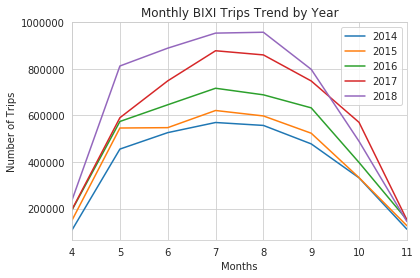

In [9]:
# Monthly Trips Trend by Year
years = [2014, 2015, 2016, 2017, 2018]
for year in years:
  df_bixi.loc[df_bixi['Year'] == year].groupby(by=['Month'])['Bike_Move_Out'].sum().plot(kind='line')
  plt.legend(years)
plt.title('Monthly BIXI Trips Trend by Year')
plt.xlabel('Months')
plt.ylabel('Number of Trips')
plt.show()


From the above monthly trips trends of different years, we can see that May to August is the favorite time for BIXI bike riders.

In [11]:
# Total number of Trips in Week days (0 = MOnday, 6 = Sunday) by Year
df_bixi.groupby(by=['Year', 'Week_Day'])['Bike_Move_Out'].sum()

Year  Week_Day
2014  0           456641
      1           462082
      2           483623
      3           492734
      4           495352
      5           384968
      6           360876
2015  0           454186
      1           486587
      2           535378
      3           564342
      4           544101
      5           457947
      6           401342
2016  0           560265
      1           627808
      2           632176
      3           607976
      4           613929
      5           503056
      6           454870
2017  0           601477
      1           715465
      2           761802
      3           738848
      4           664458
      5           653033
      6           605274
2018  0           699145
      1           790207
      2           790648
      3           818492
      4           842520
      5           709839
      6           626690
Name: Bike_Move_Out, dtype: int64

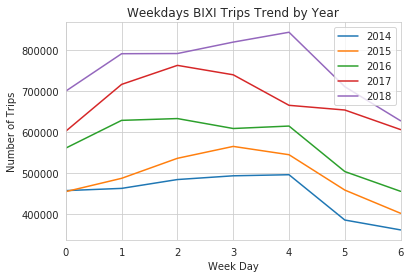

In [14]:
# Week days Trips Trend by Year
years = [2014, 2015, 2016, 2017, 2018]
for year in years:
  df_bixi.loc[df_bixi['Year'] == year].groupby(by=['Week_Day'])['Bike_Move_Out'].sum().plot(kind='line')
  plt.legend(years)
plt.title('Weekdays BIXI Trips Trend by Year')
plt.xlabel('Week Day')
plt.ylabel('Number of Trips')
plt.show()

In [15]:
# Total number of Trips in each hour (24 hours) by Year
df_bixi.groupby(by=['Year', 'Hour'])['Bike_Move_Out'].sum()

Year  Hour
2014  0        54669
      1        33577
      2        22248
      3        18240
      4         8384
      5        11685
      6        37099
      7       131949
      8       248511
      9       149559
      10      112951
      11      139446
      12      168080
      13      168553
      14      168181
      15      195244
      16      266428
      17      334800
      18      250114
      19      181405
      20      141183
      21      117354
      22       97774
      23       78842
2015  0        61379
      1        37483
      2        25425
      3        20606
      4         9122
      5        12659
               ...  
2017  18      388004
      19      286498
      20      225834
      21      185474
      22      154734
      23      121109
2018  0        88419
      1        56765
      2        37950
      3        32339
      4        14718
      5        21115
      6        65182
      7       213174
      8       414004
      9       254059
  

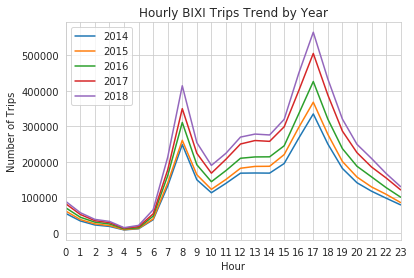

In [25]:
# Hourly Trips Trend by Year
years = [2014, 2015, 2016, 2017, 2018]
for year in years:
  df_bixi.loc[df_bixi['Year'] == year].groupby(by=['Hour'])['Bike_Move_Out'].sum().plot(kind='line')
  plt.legend(years)
plt.title('Hourly BIXI Trips Trend by Year')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
x = [0, 23]
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.show()

In [50]:
# Popular 10 destination station (number of trips ended in a particular station) by year
years = [2014, 2015, 2016, 2017, 2018]
for year in years:
  print('Top 10 destination station of Year', year)
  print(df_bixi[df_bixi['Year']==year].groupby(by=['Station_Code'])['Bike_Move_In'].sum().nlargest(10))

Top 10 destination station of Year 2014
Station_Code
6184    43765
6078    39310
6064    34819
6012    34664
6015    31664
6034    27886
6100    26837
6043    24032
6032    23123
6009    21978
Name: Bike_Move_In, dtype: int64
Top 10 destination station of Year 2015
Station_Code
6184    40485
6078    35266
6012    34500
6015    34063
6064    33055
6100    32934
6034    31877
6043    30232
6026    28575
6009    25894
Name: Bike_Move_In, dtype: int64
Top 10 destination station of Year 2016
Station_Code
6078    46552
6015    43093
6100    42539
6012    38621
6064    37839
6026    36563
6184    35996
6034    33511
6136    30944
6052    30428
Name: Bike_Move_In, dtype: int64
Top 10 destination station of Year 2017
Station_Code
6015    61122
6100    57337
6078    49204
6012    48501
6026    40818
6184    39860
6064    39181
6406    37147
6052    36776
6034    34184
Name: Bike_Move_In, dtype: int64
Top 10 destination station of Year 2018
Station_Code
6015    55448
6100    54463
6012    49282
6